<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Objective" data-toc-modified-id="Objective-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Objective</a></span></li><li><span><a href="#Variables-in-the-dataset" data-toc-modified-id="Variables-in-the-dataset-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Variables in the dataset</a></span></li></ul></li><li><span><a href="#Sourcing-and-Loading-the-Data" data-toc-modified-id="Sourcing-and-Loading-the-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Sourcing and Loading the Data</a></span><ul class="toc-item"><li><span><a href="#Import-libraries" data-toc-modified-id="Import-libraries-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Import libraries</a></span></li><li><span><a href="#Load-the-data" data-toc-modified-id="Load-the-data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Load the data</a></span></li></ul></li><li><span><a href="#Cleaning,-transforming-and-visualizing-data" data-toc-modified-id="Cleaning,-transforming-and-visualizing-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Cleaning, transforming and visualizing data</a></span><ul class="toc-item"><li><span><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Data Cleaning</a></span><ul class="toc-item"><li><span><a href="#Categorical-Variables" data-toc-modified-id="Categorical-Variables-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Categorical Variables</a></span></li><li><span><a href="#Numeric-Features" data-toc-modified-id="Numeric-Features-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Numeric Features</a></span></li></ul></li><li><span><a href="#Data-Wrangling" data-toc-modified-id="Data-Wrangling-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Data Wrangling</a></span></li><li><span><a href="#Saving-data" data-toc-modified-id="Saving-data-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Saving data</a></span></li></ul></li></ul></div>

Project: Customer Behavior Analysis  and Prediction

## Introduction

Customer Personality Analysis helps the business to better understand its customers and makes it easier for them to make decisions based on its target customers groups.

This project is using the dataset ['marketing_campaign.csv'](https://www.kaggle.com/imakash3011/customer-personality-analysis?select=marketing_campaign.csv) from kaggle and investigating if customers would accept the offer from the last campaign, which is a very common problem many retailer business is facing to.

###  Objective

To perform machine learning to forecast if an mid-aged (40-50) customer would accept the offer in the last champaign.

For each technique and its corresponding model, I will assess its performance by comparing the predicted output with the actual result. Finally, all models will be compared to each other, and we will find out which algorithm works the best.

###  Variables in the dataset

a. Customer information
 - Year_Birth: Customer's birth year
 - Education: Customer's education level
 - Marital_Status: Customer's marital status
 - Income: Customer's yearly household income
 - Kidhome: Number of children in customer's household
 - Teenhome: Number of teenagers in customer's household
 - Dt_Customer: Date of customer's enrollment with the company
 - Complain: if the customer complained in the last 2 years
***
b. Amount spent on each category in last 2 years
 - MntWines: Amount spent on wine
 - MntFruits: Amount spent on fruits
 - MntMeatProducts: Amount spent on meat
 - MntFishProducts: Amount spent on fish
 - MntSweetProducts: Amount spent on sweets
 - MntGoldProds: Amount spent on gold
***
c. Places where customers make the purchase
 - NumWebPurchases: Number of purchases made through the company’s website
 - NumCatalogPurchases: Number of purchases made using a catalog
 - NumStorePurchases: Number of purchases made directly in stores
 - NumWebVisitsMonth: Number of visits to company’s website in the last month
***
d. Promotion activities response
 - NumDealsPurchases: Number of purchases made with a discount
 - AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
 - AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
 - AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
 - AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
 - AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
 - Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

## Sourcing and Loading the Data

This step focuses on importing packages, and organizing data to make sure that the data's well defined.

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from datetime import datetime, date, timedelta
from library.sb_utils import save_file
%matplotlib inline

plt.rcParams.update(plt.rcParamsDefault)
sns.set()

### Load the data

In [2]:
# read data
df = pd.read_csv('./Data/marketing_campaign.csv', sep='\t')

In [3]:
# check the first few rows of data to identify the features (dependent and independent)
print(df.shape)
df.head()

(2240, 29)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.ID.nunique()

2240

 - The dataset contains information of 2240 customers and 29 features. 

In [5]:
# Check null/missing values
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [6]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
# summary statistics
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


**Initial observations:**
 
 - No null and missing values in the dataset
 - the max income 666666 (?) is much higher than the 3rd quantile (75%).
 - the maximum amount spent on Wines and Meat is much larger than that spent on other products. 
 - there are 3 categorical objects
 - 'Dt_Customer' needs to be parsed as datetime data type

## Cleaning, transforming and visualizing data

### Data Cleaning 
 Remove less useful information (Drop columns); 'Z_CostContact' and 'Z_Revenue' are not shown on the variable description. 'Recency' - less significant with little variation

In [8]:
# unused 
print(df['Z_CostContact'].unique())
print(df['Z_Revenue'].unique())

[3]
[11]


In [9]:
To_Drop = ['Z_CostContact', 'Z_Revenue']
df.drop(columns=To_Drop, axis=1, inplace=True)

No two columns are too much correlated with each other, so we can't drop any column on the basis of correlation.

####  Categorical Variables 

In [10]:
# 'Education'
df.Education.value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

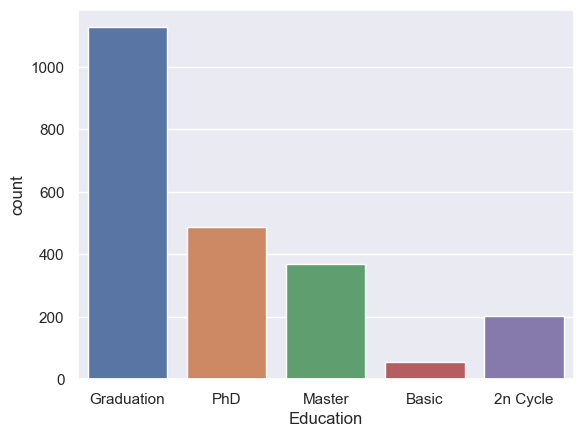

In [11]:
sns.countplot(x=df.Education)
sns.set(rc={'figure.figsize':(4,4)})
plt.show()

In [12]:
# combine the "Basic" and "2n Cycle" education level into an "Undergraduate" level
df['Edu'] = df.Education.replace({"Basic":"Undergrad","2n Cycle":"Undergrad", 
                                            "Graduation":"Grad", "Master":"Postgrad","PhD":"Postgrad"})

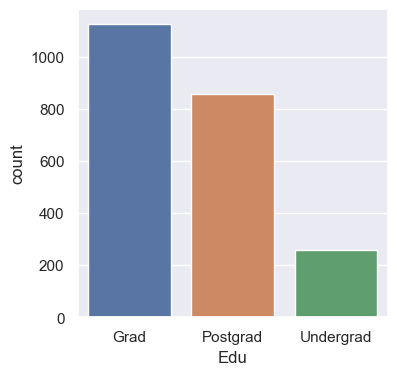

In [13]:
sns.countplot(x=df.Edu)
sns.set(rc={'figure.figsize':(4,4)})
plt.show()

In [14]:
# 'Marital_Status'
df.Marital_Status.value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

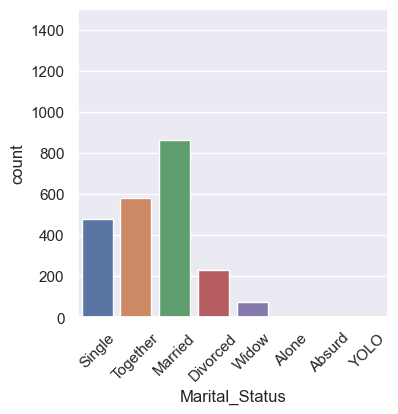

In [15]:
sns.countplot(x=df.Marital_Status)
sns.set(rc={'figure.figsize':(7,7)})
plt.xticks(rotation='45')
plt.ylim(0,1500)
plt.show();

In [16]:
# use 'single' and 'couple' in relationships
df['Household'] = df.Marital_Status.replace({"Married":"couple","Together":"couple",
                                             "Absurd":"single","Widow":"single",
                                             "YOLO":"single","Divorced":"single", "Single":"single", "Alone":"single"})

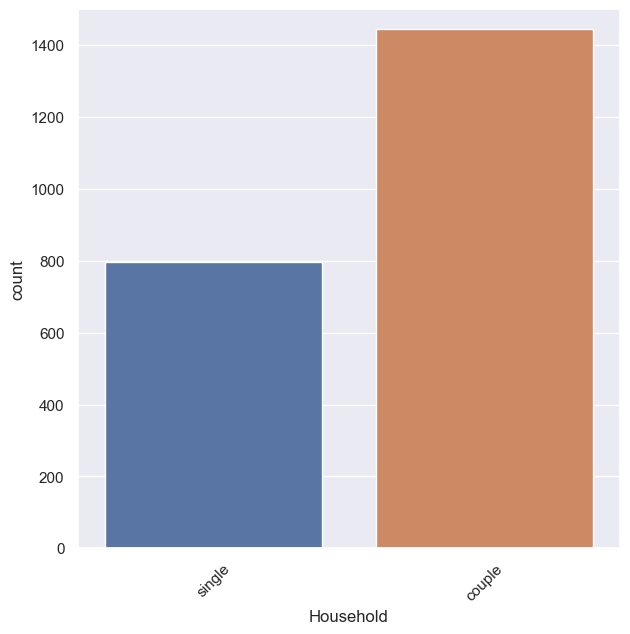

In [17]:
sns.countplot(x=df.Household)
sns.set(rc={'figure.figsize':(4,4)})
plt.xticks(rotation='45')
plt.ylim(0,1500)
plt.show();

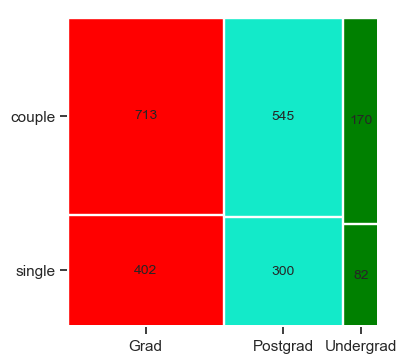

In [18]:
# Mosaic Plot. It contains four parameters (data,featuresToBeCompare,labelizer, properties) 
# most people are well educated in the dataset
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

props={}
props[('Grad','couple')]={'facecolor':'red', 'edgecolor':'white'}
props[('Grad','single')]={'facecolor':'red', 'edgecolor':'white'}

props[('Postgrad','couple')]={'facecolor':'xkcd:aqua','edgecolor':'white'}
props[('Postgrad','single')]={'facecolor':'xkcd:aqua','edgecolor':'white'}

props[('Undergrad','couple')]={'facecolor':'green','edgecolor':'white'}
props[('Undergrad','single')]={'facecolor':'green','edgecolor':'white'}

labelizer=lambda k:{('Grad','couple'):713,('Grad','single'):402,('Postgrad','couple'):545,('Postgrad','single'):300, ('Undergrad','couple'):170, ('Undergrad','single'):82 }[k]
_= mosaic(df,['Edu','Household'],labelizer=labelizer,properties=props)
plt.show();

####  Numeric Features

In [19]:
# 'AcceptedCmp' 1-6: Customers' responses to the marketing champaign 
df.rename(columns={'Response': 'AcceptedCmp6'}, inplace=True)

In [20]:
# 'Age'
# find the age of customers and save as a new feature 'Age' 
df['Age'] = 2022 - df.Year_Birth

In [21]:
# 'household' vs 'age'
plt.subplots(figsize=(10, 5))
sns.boxplot(x='Household', y='Age', hue='AcceptedCmp6', data=df)
plt.xticks(rotation='vertical')
plt.xlabel('Household')
plt.ylabel('Age')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.1,1));

In [22]:
#'Age_group' ; # clean outliers
df = df.loc[df['Age'] < 100,:]

# use pd.cut() to separate ages into groups
df['Age_group'] = pd.cut(df.Age, [20,30,40,50,60,70,80],
                         labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])

In [23]:
# plot
fig, ax = plt.subplots(1, 2, figsize=(10,5))

# Specify a horizontal barplot ('barh') as kind of plot (kind=)
df.Age.plot(kind='hist', bins=20, ax=ax[0])
ax[0].set_title('Age')
ax[0].set_ylabel('Count')

df.Income.plot(kind='hist', bins=20,  ax=ax[1])
ax[1].set_title('Income')
ax[1].set_ylabel('Count')

Text(0, 0.5, 'Count')

In [24]:
# 'Income' ; # clean outliers
df = df[(df.Income > 15000) & (df.Income < 110000)]

plt.subplots(figsize=(10, 5))
sns.boxplot(x='Edu', y='Income', hue='AcceptedCmp6', data=df)
plt.xticks(rotation='vertical')
plt.xlabel('Education')
plt.ylabel('Income')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.1,1));

In [25]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'AcceptedCmp6', 'Edu', 'Household', 'Age',
       'Age_group'],
      dtype='object')

In [26]:
# 'Children': the total number of children per household
df['Children'] = df.Kidhome + df.Teenhome

In [27]:
# in this case, family with 3 childern seems not responding to the last champaign
plt.subplots(figsize=(10, 5))
sns.boxplot(x='Children', y='Age', hue='AcceptedCmp6', data=df)
plt.xticks(rotation='vertical')
plt.xlabel('Children')
plt.ylabel('Age')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.1,1));

In [28]:
# rename the purchased products
old = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
new = ["Wines","Fruits","Meat", "Fish","Sweets","Gold"]
df.rename(columns=dict(zip(old, new)), inplace=True)

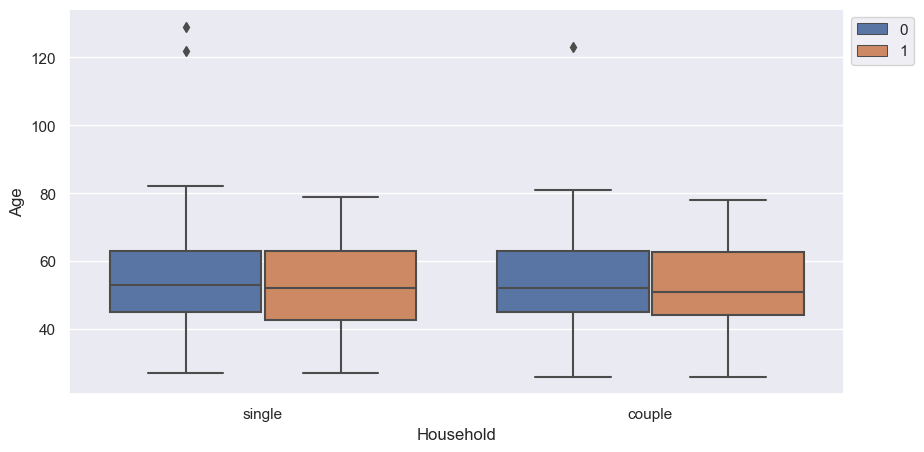

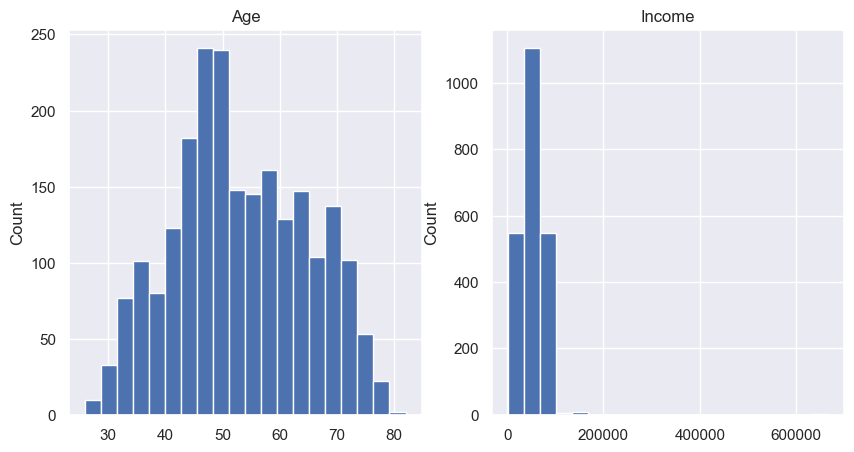

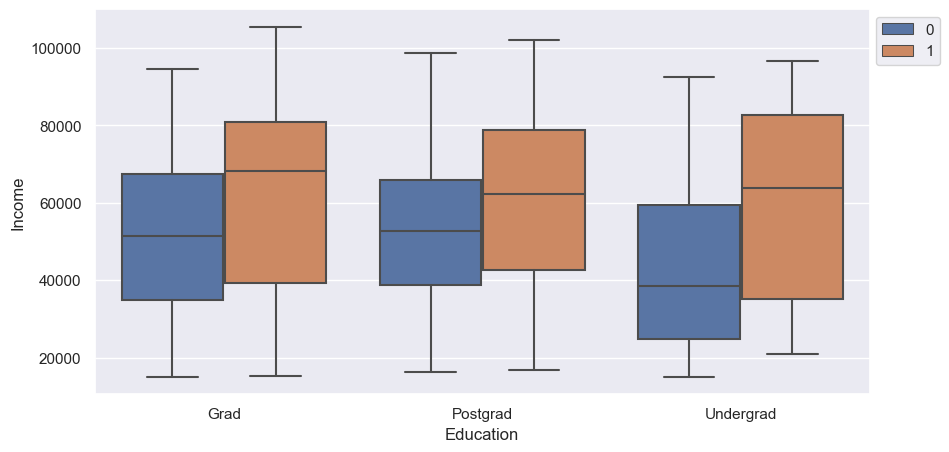

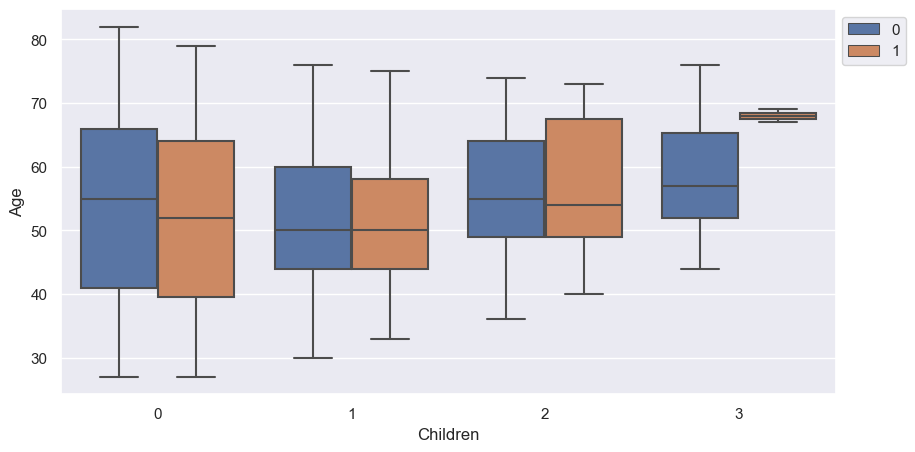

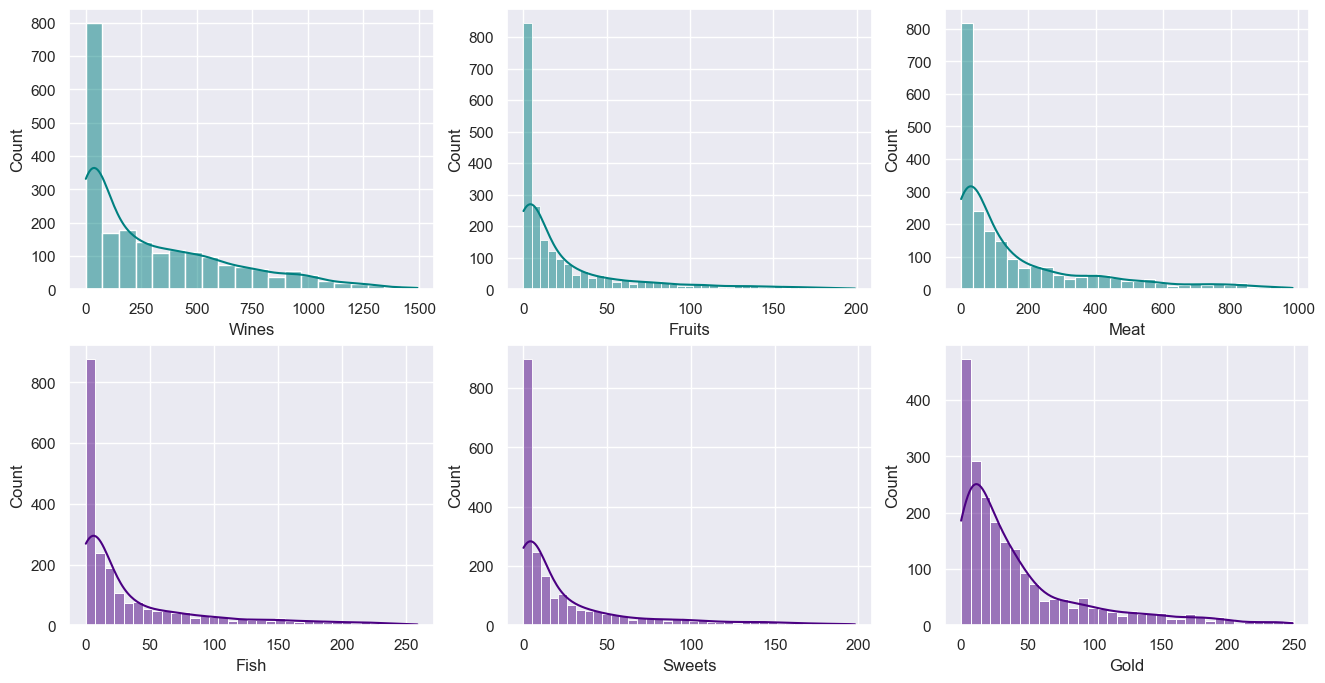

In [29]:
fig, axs = plt.subplots(2, 3, figsize=(16,8)) 

sns.histplot(data=df, x="Wines", kde=True, color="teal", ax=axs[0, 0])
sns.histplot(data=df, x="Fruits", kde=True, color="teal", ax=axs[0, 1])
sns.histplot(data=df, x="Meat", kde=True, color="teal", ax=axs[0, 2])
sns.histplot(data=df, x="Fish", kde=True, color="indigo", ax=axs[1, 0])
sns.histplot(data=df, x="Sweets", kde=True, color="indigo", ax=axs[1, 1])
sns.histplot(data=df, x="Gold", kde=True, color="indigo", ax=axs[1, 2])

plt.show()

In [30]:
# 'Income' ; 
plt.subplots(figsize=(10, 5))
sns.boxplot(x='Age_group', y='NumWebVisitsMonth', hue='AcceptedCmp6', data=df)
plt.xticks(rotation='vertical')
plt.xlabel('Age')
plt.ylabel('NumWebVisitsMonth')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.1,1));

In [31]:
# crosstable
crosstable=pd.crosstab(df['Age_group'], df['AcceptedCmp6'])

crosstable.columns = ['no', 'yes']
crosstable['ratio'] = round(crosstable.yes * 100.0 /(crosstable.no + crosstable.yes), 2)
crosstable

,no,yes,ratio
Age_group,,,
20-30,20,5,20.00
30-40,235,64,21.40
40-50,542,82,13.14
50-60,488,81,14.24
60-70,394,67,14.53
70-80,143,29,16.86


###  Data Wrangling 
 <br>
The first thing is a way to compare customers behaviors. Look at the customer information closely and re-organize them into new categories. And look for trends which can help business formulate future offers.

The 0/1 indicators are for whether or not customers responded to a given offer.

In [32]:
byspent = pd.melt(df[['AcceptedCmp6', 'Wines', 'Fruits', 'Meat', 'Fish','Sweets', 'Gold']],
                id_vars='AcceptedCmp6',
                var_name='Products',
                value_vars=['Wines', 'Fruits', 'Meat', 'Fish','Sweets', 'Gold'],
                value_name='Expenses')

In [33]:
byspent

,AcceptedCmp6,Products,Expenses
0,1,Wines,635
1,0,Wines,11
2,0,Wines,426
3,0,Wines,11
4,0,Wines,173
...,...,...,...
12907,0,Gold,247
12908,0,Gold,8
12909,0,Gold,24
12910,0,Gold,61


In [34]:
#by spent per product
plt.subplots(figsize=(12, 7))
sns.boxplot(x='Products', y='Expenses', hue='AcceptedCmp6', data=byspent)
plt.xticks(rotation='vertical')
plt.xlabel('Products')
plt.ylabel('Expense ($)');

In [35]:
# by age
byage = df.groupby(['Age_group']).mean()

In [36]:
byage.head()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,AcceptedCmp6,Age,Children
Age_group,,,,,,,,,,,,,,,,,,,,,
20-30,5642.520000,1993.040000,61840.960000,0.120000,0.000000,46.240000,345.320000,42.320000,350.680000,74.240000,...,3.920000,0.120000,0.040000,0.160000,0.160000,0.040000,0.040000,0.200000,28.960000,0.120000
30-40,5776.819398,1985.682274,46933.986622,0.561873,0.006689,47.739130,262.692308,29.153846,186.936455,38.882943,...,5.364548,0.100334,0.060201,0.130435,0.083612,0.013378,0.010033,0.214047,36.317726,0.568562
40-50,5415.448718,1975.931090,49172.556090,0.596154,0.463141,49.102564,252.304487,23.391026,136.206731,34.089744,...,5.644231,0.084936,0.054487,0.059295,0.056090,0.008013,0.009615,0.131410,46.068910,1.059295
50-60,5505.966608,1967.061511,53050.035149,0.439367,0.667838,49.673111,326.319859,26.613357,157.926186,35.982425,...,5.453427,0.065026,0.082601,0.054482,0.045694,0.015817,0.001757,0.142355,54.938489,1.107206
60-70,5687.633406,1956.455531,57369.626898,0.253796,0.735358,49.631236,371.650759,28.143167,184.674620,41.802603,...,4.791757,0.054230,0.099783,0.069414,0.073753,0.023861,0.013015,0.145336,65.544469,0.989154


In [37]:
# young people spend more on meat and senior people spend more on wines...
byage[['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']] 

,Wines,Fruits,Meat,Fish,Sweets,Gold
Age_group,,,,,,
20-30,345.320000,42.320000,350.680000,74.240000,42.560000,61.960000
30-40,262.692308,29.153846,186.936455,38.882943,29.341137,42.749164
40-50,252.304487,23.391026,136.206731,34.089744,24.932692,39.520833
50-60,326.319859,26.613357,157.926186,35.982425,26.186292,45.304042
60-70,371.650759,28.143167,184.674620,41.802603,29.442516,47.681128
70-80,415.098837,31.401163,214.186047,48.872093,31.325581,51.116279


In [38]:
import matplotlib.ticker as mticker

fig, ax = plt.subplots(figsize=(12,7))
ax.bar(byage.index, byage['Wines'], label='Wines')
ax.bar(byage.index, byage['Fruits'], bottom=byage['Wines'], label='Fruits')
ax.bar(byage.index, byage['Meat'], bottom=byage['Wines'] + byage['Fruits'], label='Meat')
ax.bar(byage.index, byage['Fish'], bottom=byage['Wines'] + byage['Fruits'] 
       + byage['Meat'], label='Fish')
ax.bar(byage.index, byage['Sweets'], bottom=byage['Wines'] + byage['Fruits'] 
       + byage['Meat'] + byage['Fish'], label='Sweets')
ax.bar(byage.index, byage['Gold'], bottom=byage['Wines'] + byage['Fruits'] 
       + byage['Meat'] + byage['Fish'] + byage['Sweets'], label='Gold')

#ax.set_xticklabels(byage.index, rotation=90)
ax.set_xlabel('Age group')
ax.set_ylabel('Expense ($)')
ax.legend(bbox_to_anchor= (1.02, 1));

 - The figure above gives us a sense how the average expenses vary from young people to senior people as the following: Young people appear spending more on food (meat and fish) and senior people spending more on wines (less on sweets) while middle-aged people spending the least. 

In [39]:
To_Drop = ['ID', 'Year_Birth', 'Education', 'Marital_Status','Kidhome', 'Teenhome']
df.drop(columns=To_Drop, axis=1, inplace=True)

### Saving data

In [40]:
print(df.shape)

(2152, 26)


In [41]:
# save the data to a new csv file
datapath = './Data'
save_file(df, '01_cleaned_data.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)Y
Writing file.  "./Data\01_cleaned_data.csv"


**Conclusions:**
   - The dataset has 2152 rows & 26 columns.
   - No any missing values in the dataset.
   - We could see that the data is right skewed for most of the features (the mean value is larger than median value (50th percentile: 50%). This is an indication that those features have a right skewed data.
   - There is a slight imbalance in the feature 'AcceptedCmp6' (The number of people not responded to the last champaign is more than that of accepting the offer).